#Import Dependencies

In [32]:
from google.colab import drive, files
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

##Instal TPOT

In [9]:
!pip install tpot
import tpot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#Eksplorasi Dataset

##Import Dataset

In [3]:
# Mount google drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [4]:
train_dir = ('/content/drive/MyDrive/Dataset_ML_Lanjut/train.csv')
test_dir = ('/content/drive/MyDrive/Dataset_ML_Lanjut/test.csv')

In [101]:
train_data = pd.read_csv(train_dir)
test_data = pd.read_csv(test_dir)

In [7]:
train_data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.1471,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.186,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.1279,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.243,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.1052,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.198,0.1043,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4,0.1625,0.2364,0.07678


In [11]:
test_data.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,911320501,11.600,18.36,73.88,412.7,0.08508,0.05855,0.03367,0.017770,0.1516,...,12.77,24.02,82.68,495.1,0.1342,0.1808,0.18600,0.08288,0.3210,0.07863
1,911320502,13.170,18.22,84.28,537.3,0.07466,0.05994,0.04859,0.028700,0.1454,...,14.90,23.89,95.10,687.6,0.1282,0.1965,0.18760,0.10450,0.2235,0.06925
2,9113239,13.240,20.13,86.87,542.9,0.08284,0.12230,0.10100,0.028330,0.1601,...,15.44,25.50,115.00,733.5,0.1201,0.5646,0.65560,0.13570,0.2845,0.12490
3,9113455,13.140,20.74,85.98,536.9,0.08675,0.10890,0.10850,0.035100,0.1562,...,14.80,25.46,100.90,689.1,0.1351,0.3549,0.45040,0.11810,0.2563,0.08174
4,9113514,9.668,18.10,61.06,286.3,0.08311,0.05428,0.01479,0.005769,0.1680,...,11.15,24.62,71.11,380.2,0.1388,0.1255,0.06409,0.02500,0.3057,0.07875


##Pre-processing

###Missing value removal

Missing value pada train.csv :
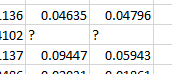

Missing value pada test.csv :  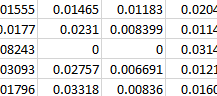

In [102]:
#Definisikan missing value
train_data = pd.read_csv(train_dir, na_values='?')
test_data = pd.read_csv(test_dir, na_values='0')

In [103]:
#Jumlah missing value
missing_values_count_train = train_data.isnull().sum()
missing_values_count_test = test_data.isnull().sum()
print("Jumlah missing value di train.csv: \n", missing_values_count_train)
print("Jumlah missing value di test.csv: \n", missing_values_count_test)

Jumlah missing value di train.csv: 
 id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             7
concave points_mean        7
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               7
concave points_se          7
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            7
concave points_worst       7
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64
Jumlah missing value d

In [104]:
#Ganti missing value dengan nilai mean
train_data = train_data.fillna(train_data.mean())
test_data = test_data.fillna(test_data.mean())

<ipython-input-104-fe1d00ea5c2a>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_data = train_data.fillna(train_data.mean())


In [105]:
#Jumlah mising value setelah diganti dengan mean
missing_values_count_train = train_data.isnull().sum()
missing_values_count_test = test_data.isnull().sum()
print("Jumlah missing value di train.csv: \n", missing_values_count_train)
print("Jumlah missing value di test.csv: \n", missing_values_count_test)

Jumlah missing value di train.csv: 
 id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64
Jumlah missing value d

In [119]:
#Hasil preprocessing
train_data.to_csv('train_data_preprocessed.csv', index=False)
test_data.to_csv('test_data_preprocessed.csv', index=False)

##Split feature dan label

Percobaan yang dilakukan adalah mendiagnosis apakah suatu tumor pada indikasi kanker payudara merupakan tumor yang berbahaya atau bukan.

'Malignant' yaitu jenis tumor yang berbahaya direpresentasikan sebagai 'M' pada kolom 'diagnosis' pada dataset

'Benign' yaitu jenis tumor yang tidak berbahaya direpresentasikan sebagai 'B' pada kolom 'diagnosis' pada dataset

In [68]:
print(test_data.columns)
print("Jumlah kolom : ", len(test_data.columns))

Index(['id', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')
Jumlah kolom :  31


In [69]:
print(train_data.columns)
print("Jumlah kolom : ", len(train_data.columns))

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')
Jumlah kolom :  32


Terlihat bahwa data test tidak memiliki label 'diagnosis'. Agar model pada percobaan ini dapat di evaluasi, maka train.csv akan di split untuk training dan testing sedangkan test.csv akan dijadikan hasil diagnosis kanker payudara dari percobaan ini.

Maka dari itu, kolom 'diagnosis' akan dijadikan label pada eksperimen ini. Namun tipe data label diagnosis akan di convert menjadi integer yaitu '0' merepresentasikan 'B' yang menandakan bukan kanker. Sedangkan '1' merepresentasikan 'M' yang menandakan kanker

In [106]:
train_data['diagnosis'] = train_data['diagnosis'].map({'B': 0, 'M': 1})

In [107]:
train_data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [108]:
#Definisikan fitur dan label
features = train_data[['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']]
label = train_data[['diagnosis']]

In [109]:
#Split training dan testing
x_train, x_test, y_train, y_test = train_test_split(features, label, test_size = 0.2)

#TPOT Classifier

Percobaan ini akan menggunakan tools TPOT yaitu Auto Machine Learning tools yang berbasis Genetic Programming.

Genetic programming termasuk bagian dari Evolutionary Algorithm yaitu algoritma yang terinspirasi dari mekanisme keturunan biologis yang mempunyai mekanisme seperti mutation, crossover, natural selection dan survial.

TPOT akan secara otomatis menentukan model, hyperparameter, dan features yang paling cocok untuk suatu permasalahan Machine Learning

##Inisialisasi TPOT

In [77]:
from tpot.tpot import TPOTClassifier
#Percobaan ini akan mencoba 5 generasi untuk mencari nilai optimasi Model ML yang optimal
tpot = TPOTClassifier(generations = 5, verbosity = 2)


##Fit Data

In [78]:
#Fit data
tpot.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Optimization Progress:   0%|          | 0/600 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.9702702702702704

Generation 2 - Current best internal CV score: 0.9783783783783784

Generation 3 - Current best internal CV score: 0.9783783783783784

Generation 4 - Current best internal CV score: 0.9783783783783784

Generation 5 - Current best internal CV score: 0.9783783783783784

Best pipeline: GradientBoostingClassifier(PolynomialFeatures(input_matrix, degree=2, include_bias=False, interaction_only=False), learning_rate=1.0, max_depth=3, max_features=0.25, min_samples_leaf=13, min_samples_split=5, n_estimators=100, subsample=0.9500000000000001)


TPOTClassifier(generations=5, verbosity=2)

##Evaluasi

In [111]:
#Hasil evaluasi model
tpot.score(x_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.978494623655914

#Klasifikasi kanker payudara dari Dataset Breast Cancer Wisconsin 

Dilakukan hasil dari prediksi menggunakan model tpot yang telah fit. Output dari prediksi ini akan langsung menghasilkan file .csv yang berisi prediksi kanker payudra berdasarkan file test.csv

In [112]:
test_data = test_data.drop('id', axis=1)

In [113]:
predictions = tpot.predict(test_data)


In [116]:
test_data['Diagnosis Predictions'] = predictions
test_data['Diagnosis Predictions'] = test_data['Diagnosis Predictions'].map({0: "Benign", 1: "Malignant"})
test_data.to_csv('Diagnosis_Prediction.csv', index=False)

Hasil prediksi :
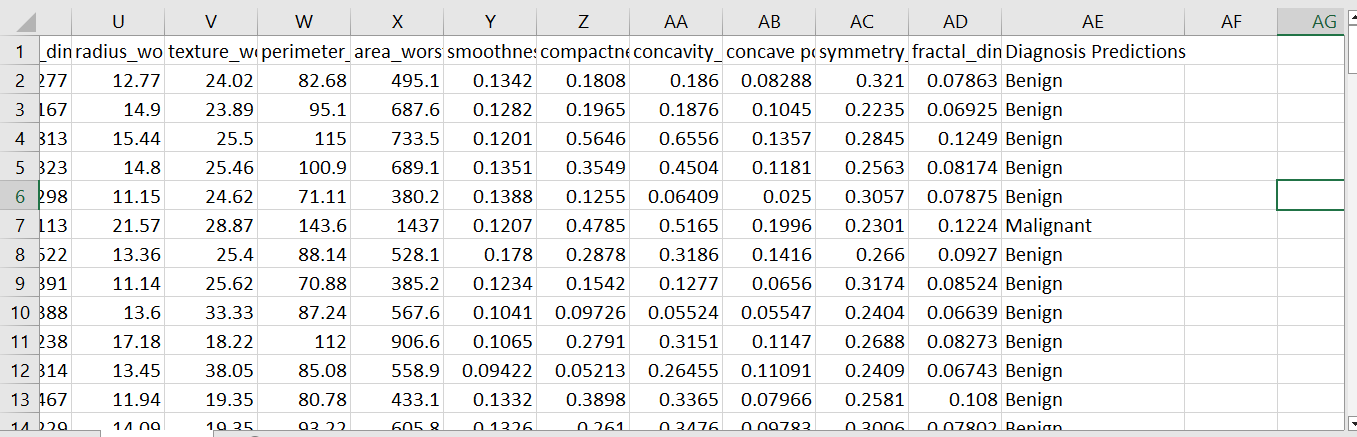

Kolom "Diagnosis Prediction" merupakan hasil prediksi deteksi kanker payudara.